In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('CVD_cleaned.csv')

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
# Check missing values
print(df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [5]:
# Display the column types
print("Column Types:")
print(df.dtypes)

Column Types:
General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [6]:
# Handle Categorical Variables
categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 
                       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

In [7]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

In [8]:
# Split dataset 
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

In [9]:
# Split dataset training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale numeric
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Make predictions 
test_preds = model.predict(X_test_scaled)

In [13]:
# Print unique values in y_test and test_preds
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in test_preds:", np.unique(test_preds))

Unique values in y_test: ['No' 'Yes']
Unique values in test_preds: ['No' 'Yes']


In [14]:
# Evaluate model
test_accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds, pos_label='Yes')
recall = recall_score(y_test, test_preds, pos_label='Yes')
f1 = f1_score(y_test, test_preds, pos_label='Yes')

# Print metrics
print("Testing Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Testing Accuracy: 0.9192825112107623
Precision: 0.5088282504012841
Recall: 0.06343806283770262
F1 Score: 0.11281138790035589


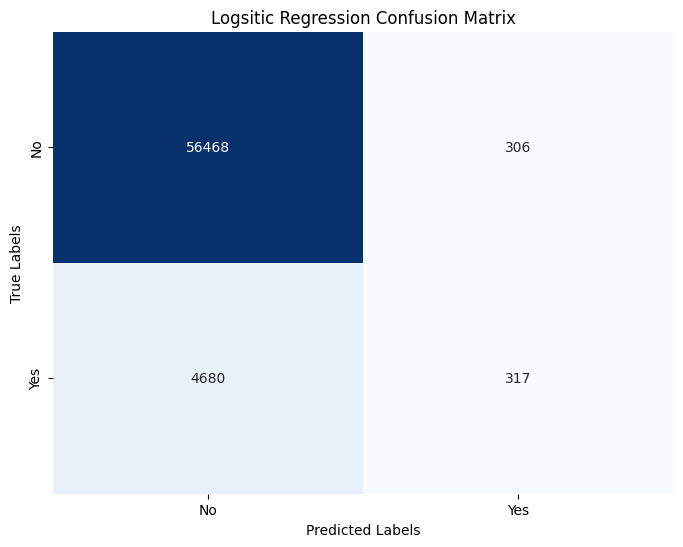

In [15]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)

# Plot 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logsitic Regression Confusion Matrix')
plt.show()


In [16]:
# Second model KNN

# Scale the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Train KNN classifier
k = 5  
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
# Make predictions
knn_test_preds = knn_model.predict(X_test_scaled)

In [19]:
# Evaluate KNN model
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
knn_precision = precision_score(y_test, knn_test_preds, pos_label='Yes')
knn_recall = recall_score(y_test, knn_test_preds, pos_label='Yes')
knn_f1 = f1_score(y_test, knn_test_preds, pos_label='Yes')

# Print metrics
print("k-NN Testing Accuracy:", knn_test_accuracy)
print("k-NN Precision:", knn_precision)
print("k-NN Recall:", knn_recall)
print("k-NN F1 Score:", knn_f1)

k-NN Testing Accuracy: 0.9089702287481181
k-NN Precision: 0.32395950506186727
k-NN Recall: 0.11526916149689814
k-NN F1 Score: 0.1700369003690037


In [20]:
# Train
k = 10 # Higher K value
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Make predictions 
knn_test_preds = knn_model.predict(X_test_scaled)

# Evaluate 
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
knn_precision = precision_score(y_test, knn_test_preds, pos_label='Yes')
knn_recall = recall_score(y_test, knn_test_preds, pos_label='Yes')
knn_f1 = f1_score(y_test, knn_test_preds, pos_label='Yes')

# Print 
print("k-NN Testing Accuracy:", knn_test_accuracy)
print("k-NN Precision:", knn_precision)
print("k-NN Recall:", knn_recall)
print("k-NN F1 Score:", knn_f1)

k-NN Testing Accuracy: 0.9170808308105746
k-NN Precision: 0.4084919472913616
k-NN Recall: 0.05583350010006004
k-NN F1 Score: 0.0982394366197183


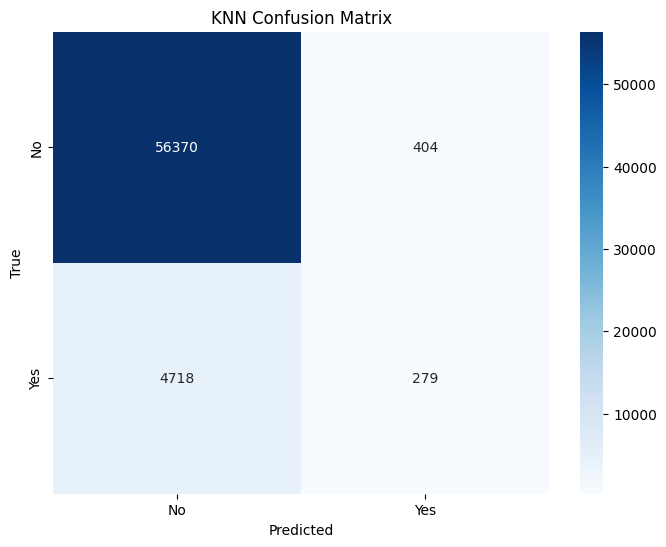

In [21]:
# KNN confusion matrix
cm = confusion_matrix(y_test, knn_test_preds)

# Heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()